=== Noise Analysis Results ===
Original Image Shape: (500, 500)
Noise Parameters: mean=0, std=15
Mean Absolute Residual Noise: 11.5033
Residual Noise Range: [-69.00, 78.00]


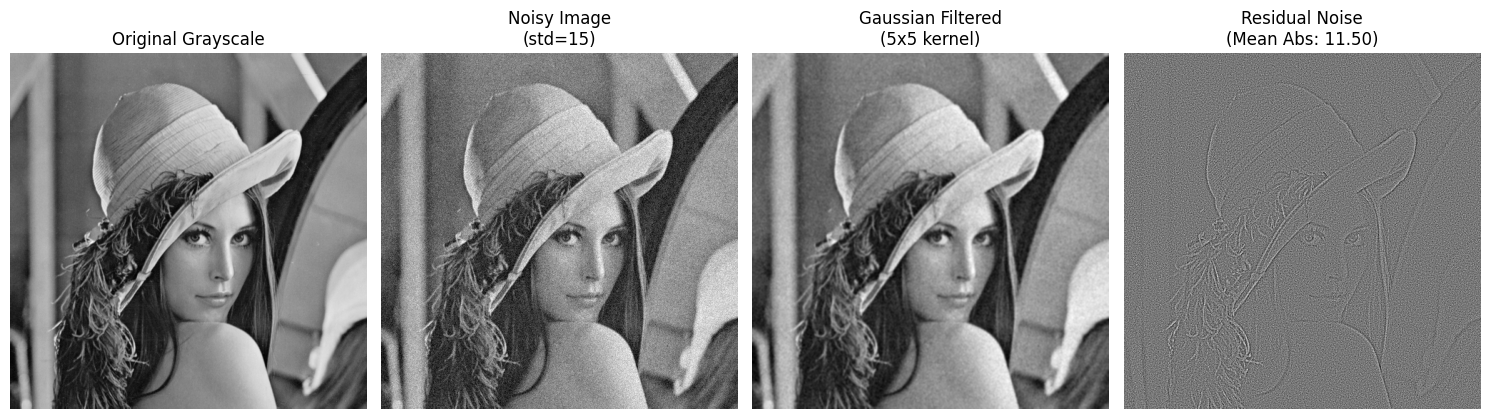


=== Statistical Summary ===
Original Image - Mean: 123.55, Std: 47.84
Noisy Image - Mean: 123.01, Std: 50.12
Filtered Image - Mean: 123.01, Std: 46.78


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load image and convert to grayscale
# Load a color image
image = cv2.imread('Lenna.png')  # Change to your image path

# If image not found, create a dummy image for demonstration
if image is None:
    print("Image not found! Creating a sample image.")
    image = np.ones((300, 400, 3), dtype=np.uint8) * 128
    cv2.putText(image, 'Sample Image', (100, 150), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. Add Gaussian Noise manually
# Convert to float for noise addition
gray_float = gray_image.astype(np.float32)

# Create Gaussian noise with mean=0, std=15
sigma = 15
noise = np.random.normal(0, sigma, gray_float.shape)

# Add noise to the original image
noisy_image_float = gray_float + noise

# Clip values to valid range [0, 255] and convert back to uint8
noisy_image = np.clip(noisy_image_float, 0, 255).astype(np.uint8)

# 3. Apply Gaussian filter (5x5 kernel)
filtered_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# 4. Calculate Residual Noise
# Convert to float for accurate subtraction
noisy_float = noisy_image.astype(np.float32)
filtered_float = filtered_image.astype(np.float32)

# Compute difference (noisy - filtered)
residual_noise = noisy_float - filtered_float

# Calculate mean absolute residual noise
mean_absolute_residual = np.mean(np.abs(residual_noise))

print(f"=== Noise Analysis Results ===")
print(f"Original Image Shape: {gray_image.shape}")
print(f"Noise Parameters: mean=0, std={sigma}")
print(f"Mean Absolute Residual Noise: {mean_absolute_residual:.4f}")
print(f"Residual Noise Range: [{residual_noise.min():.2f}, {residual_noise.max():.2f}]")

# 5. Display all images
plt.figure(figsize=(15, 5))

# Original grayscale image
plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

# Noisy image
plt.subplot(1, 4, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f'Noisy Image\n(std={sigma})')
plt.axis('off')

# Filtered image
plt.subplot(1, 4, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Gaussian Filtered\n(5x5 kernel)')
plt.axis('off')

# Residual noise (visualization)
plt.subplot(1, 4, 4)
# Normalize residual for display
residual_display = (residual_noise - residual_noise.min()) / (residual_noise.max() - residual_noise.min())
plt.imshow(residual_display, cmap='gray')
plt.title(f'Residual Noise\n(Mean Abs: {mean_absolute_residual:.2f})')
plt.axis('off')

plt.tight_layout()
plt.show()

# Additional: Display noise statistics
print("\n=== Statistical Summary ===")
print(f"Original Image - Mean: {gray_image.mean():.2f}, Std: {gray_image.std():.2f}")
print(f"Noisy Image - Mean: {noisy_image.mean():.2f}, Std: {noisy_image.std():.2f}")
print(f"Filtered Image - Mean: {filtered_image.mean():.2f}, Std: {filtered_image.std():.2f}")